In [1]:
from utils.treelite import *
from utils.visualizations import *

In [2]:
example_models = get_model_jsons("models/sklearn/5days/100_trees")

In [3]:
duplicate_data_exact = compare_models(example_models, sequentially=True, exact=True)

duplicate_data_equivalent = compare_models(example_models, sequentially=True, exact=False)

In [5]:
node_list_exact = get_node_list(example_models, exact=True)
node_list_equivalent = get_node_list(example_models, exact=False)


unique_node_counts_exact = get_counts_of_unique_nodes(node_list_exact)
unique_node_counts_equivalent = get_counts_of_unique_nodes(node_list_equivalent)

In [15]:
def plot_distribution_unique_nodes(node_list, unique_node_counts):
    total_num_nodes = len(node_list)

    duplicate_values = list(unique_node_counts.values())
    ratio_unique_nodes = sum(duplicate_values) / total_num_nodes
    num_unique_nodes = total_num_nodes - sum(duplicate_values)

    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    plt.hist(duplicate_values, bins=200)

    # Create a box to display statistics
    stats_box = f"Number of Nodes: {total_num_nodes}\nNumber of Unique Nodes: {num_unique_nodes}\nRatio of Duplicate Nodes: {ratio_unique_nodes:.4f}"
    plt.text(
        0.95,
        0.95,
        stats_box,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8, pad=0.5),
        verticalalignment="top",
        horizontalalignment="right",
        transform=ax.transAxes,
        fontsize=12,
    )

    plt.title("Frequency of Unique Nodes")
    plt.xlabel("Frequency")
    plt.ylabel("Frequency")
    plt.grid(axis="y")

    # Return the Matplotlib figure object
    # return plt.gcf()

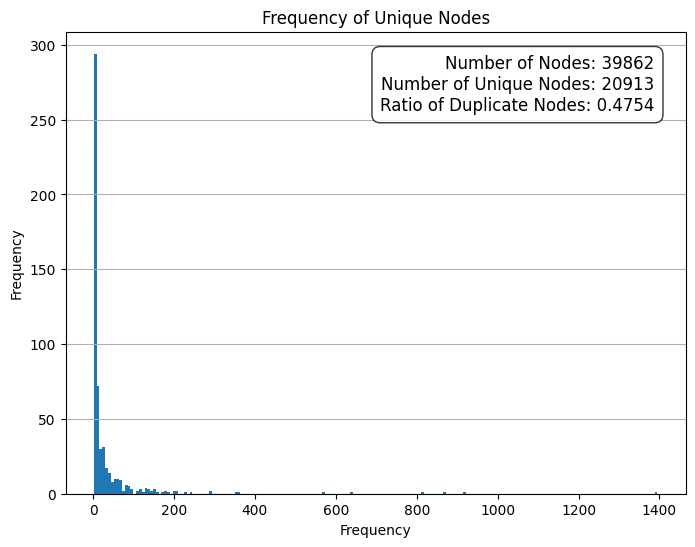

In [16]:
plot_distribution_unique_nodes(node_list_exact, unique_node_counts_exact)

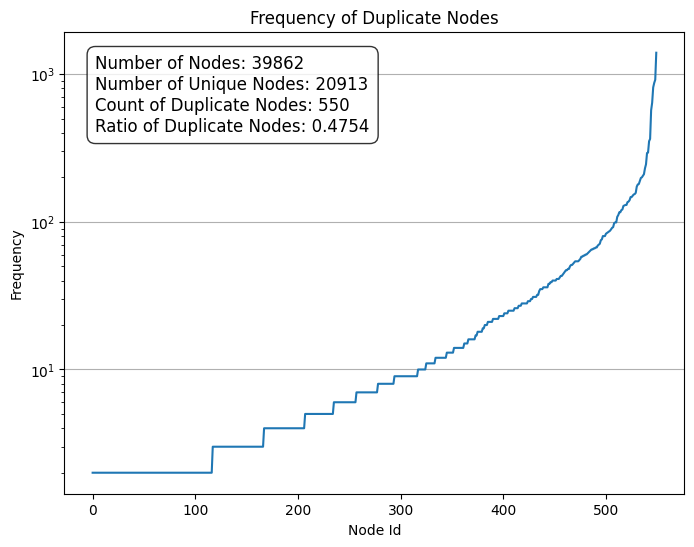

In [33]:
def plot_bars_unique_nodes(node_list, unique_node_counts):
    total_num_nodes = len(node_list)

    duplicate_values = list(unique_node_counts.values())
    ratio_unique_nodes = sum(duplicate_values) / total_num_nodes
    num_unique_nodes = total_num_nodes - sum(duplicate_values)
    num_unique_duplicates = len(duplicate_values)

    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    plt.plot(range(len(duplicate_values)), sorted(duplicate_values))

    # Create a box to display statistics
    stats_box = f"Number of Nodes: {total_num_nodes}\n\
Number of Unique Nodes: {num_unique_nodes}\n\
Count of Duplicate Nodes: {num_unique_duplicates}\n\
Ratio of Duplicate Nodes: {ratio_unique_nodes:.4f}"
    plt.text(
        0.05,
        0.95,
        stats_box,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8, pad=0.5),
        verticalalignment="top",
        horizontalalignment="left",
        transform=ax.transAxes,
        fontsize=12,
    )

    plt.title("Frequency of Duplicate Nodes")
    plt.xlabel("Node Id")
    plt.ylabel("Frequency")
    plt.grid(axis="y")
    plt.yscale("log")

    # Return the Matplotlib figure object
    return plt.gcf()


plot_bars_unique_nodes(node_list_exact, unique_node_counts_exact)